In [1]:

#pip install netCDF4

In [2]:
#conda install -c conda-forge cartopy

In [3]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as scp
import netCDF4
import cartopy.crs as ccrs
import os

In [4]:
file_path = 'Tropics_tp&cape_5*5.nc'
file_path2 = 'TropicsOcean.nc'  

#Opening dataset for land                                  
dsT = xr.open_dataset(file_path)

#Opening dataset for ocean 
dsM = xr.open_dataset(file_path2)

In [5]:
#Averaging to get daily data for land 
daily_meanT = dsT.resample(time='D').mean(dim='time')
#Averaging to get daily data for midlatitudes
daily_meanM = dsM.resample(time='D').mean(dim='time')

#Averging daily data across lat and lon for ocean 
avg_dsMT = daily_meanT.mean(dim=['latitude', 'longitude'])  
#Averging daily data across lat and lon for midlatitudes
avg_dsMM = daily_meanM.mean(dim=['latitude', 'longitude'])  

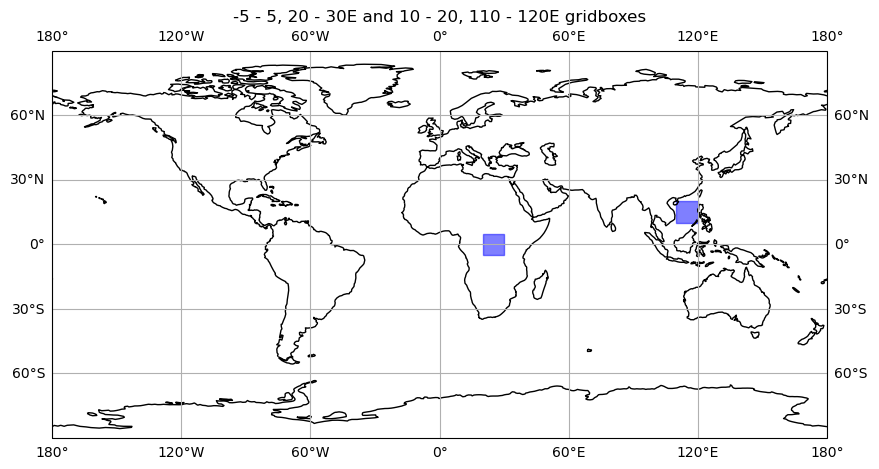

In [6]:
#Visualising the regions of the dataset 

plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.set_global()

# Defining coordinates to plot
ax.fill([20, 30, 30, 20, 20], [5, 5, -5, -5, 5], transform=ccrs.PlateCarree(), color='blue', alpha=0.5)
ax.fill([110, 120, 120, 110, 110], [10, 10, 20, 20, 10], transform=ccrs.PlateCarree(), color='blue', alpha=0.5)

# Displaying the plot
plt.title('-5 - 5, 20 - 30E and 10 - 20, 110 - 120E gridboxes')
ax.gridlines(draw_labels=True)
plt.show()

In [7]:
#Averaging 6 hourly across lat and lon for the land
avg_dsT = dsT.mean(dim=['latitude', 'longitude'])  

#Averaging 6 hourly across lat and lon for the ocean                  
avg_dsM = dsM.mean(dim=['latitude', 'longitude']) 
  

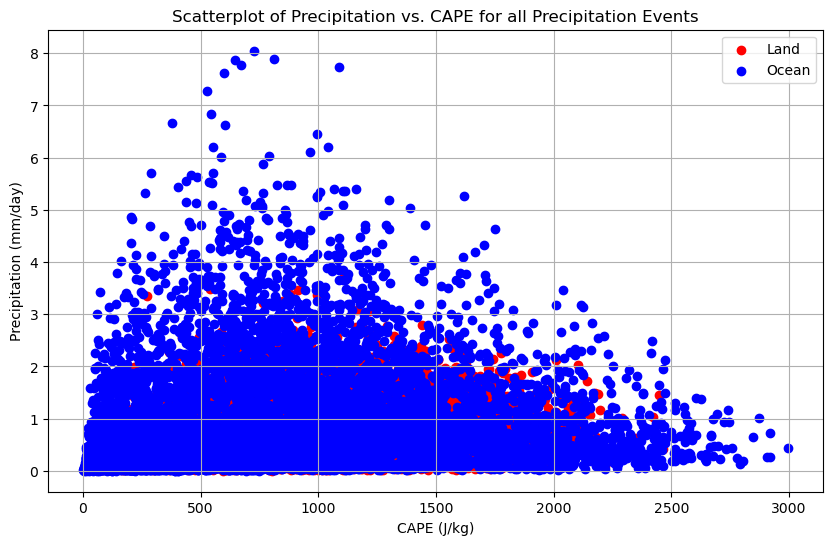

In [8]:
#Create scatterplot of precipitation vs cape

plt.figure(figsize=(10, 6))                

plt.scatter(avg_dsMT['cape'], (avg_dsMT['tp']*4000), alpha=1, c='red', label='Land')
plt.scatter(avg_dsMM['cape'], (avg_dsMM['tp']*4000), alpha=1, c='blue', label='Ocean')


plt.xlabel('CAPE (J/kg)')
plt.ylabel('Precipitation (mm/day)')
plt.title('Scatterplot of Precipitation vs. CAPE for all Precipitation Events')



plt.legend()
plt.grid(True)
plt.show()

In [9]:
#Binning the cape into 15 different bins and averaging precipitation in those bins to understand the relation between precipitation and cape

cape_bins = np.linspace(0, 2500, 17)
tps = []
for data in (avg_dsMT, avg_dsMM):
    positive_precip = data['tp'].where((data['tp']*24000) > 1.0)
    cape_positive_precip = data['cape'].where((data['tp']*24000) > 1.0)
    binned_precipitation = positive_precip.groupby_bins(cape_positive_precip, bins=cape_bins)
    avgtp = binned_precipitation.mean()
    cape_mid = (cape_bins[1:] + cape_bins[:-1])/2
    tps.append(avgtp)

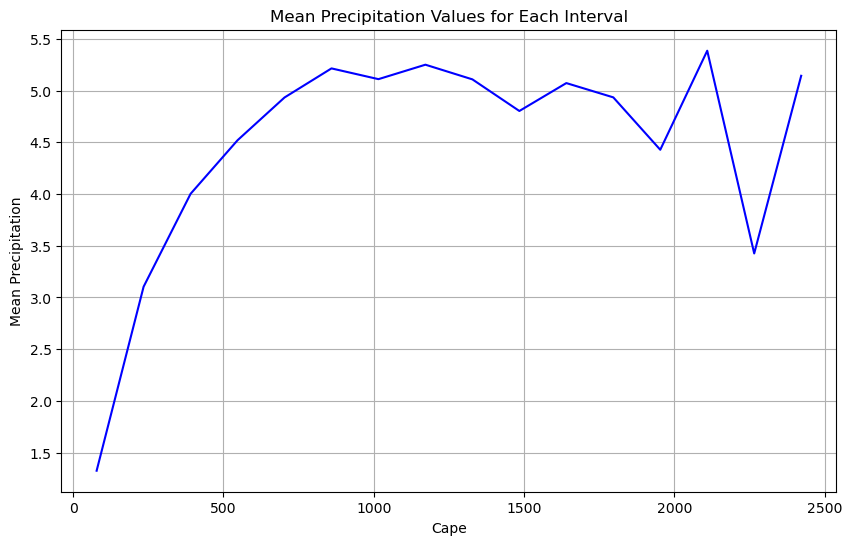

In [10]:
#Plotting for Land

plt.figure(figsize=(10, 6))
plt.plot(cape_mid, tps[0]*24000,color = 'b')
plt.xlabel('Cape')
plt.ylabel('Mean Precipitation')
plt.title('Mean Precipitation Values for Each Interval')
plt.grid(True)


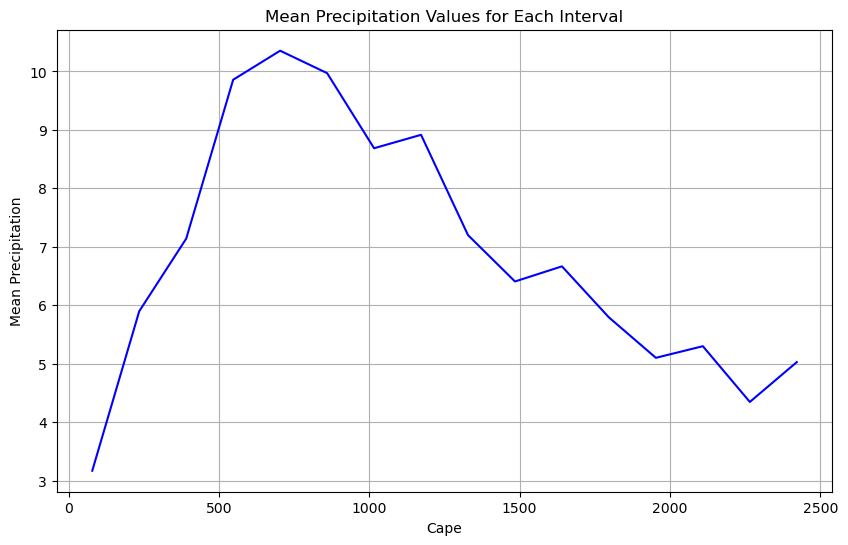

In [11]:
#Plotting for Ocean

plt.figure(figsize=(10, 6))
plt.plot(cape_mid, tps[1]*24000,color = 'b')
plt.xlabel('Cape')
plt.ylabel('Mean Precipitation')
plt.title('Mean Precipitation Values for Each Interval')
plt.grid(True)

In [12]:
''' 1) Account for seasons for plots. 2) Make a panel plot for seasons. 3) Spearmen rank correlation.  '''

'''1) Logging in 2) Setting up conda environment 3)Connecting VS code 4)Make a single plot'''

'1) Logging in 2) Setting up conda environment 3)Connecting VS code 4)Make a single plot'